In [24]:

import functools

import numpy as np
from numpy.random import RandomState
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU, Activation
    
# import train data
TRAIN_DATA_URL = "./data/test/specific/output_1.csv"
# TEST_DATA_URL = "./data/test/auckland/data.csv"

# read and import the data


Beds              float64
Land Area         float64
Living Area       float64
Market Value $    float64
grade               int64
garage              int64
long              float64
lat               float64
dtype: object
0     670000.0
1     670000.0
2     657000.0
3     851000.0
4     815000.0
        ...   
80    885000.0
81    830000.0
82    820000.0
83    920000.0
84    685000.0
Name: Market Value $, Length: 81, dtype: float64


<AxesSubplot:xlabel='Land Area'>

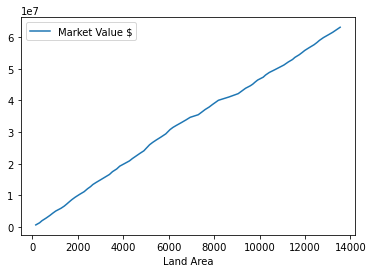

In [25]:
df = pd.read_csv(TRAIN_DATA_URL, thousands=',', index_col=False)

df['Market Value $'] = df['Market Value $'].str.replace('$', '')
df['Market Value $'] = df['Market Value $'].str.replace(',', '')
df['Market Value $'] = df['Market Value $'].astype('float')

# drop unnessesary and unusable data
#df = df.drop(['address', 'owners', 'suburb', 'town', 'ta_name', 'property_type', 'sale_date', 'listing_date', 'provisional_sale_price', 'provisional_sale_date', 'building_age', 'capital_value', 'rem', 'rem2'], axis=1)
df = df.drop(["Job Code", "Valuation Date", "Existing/New", "Lot", "Street No.", "Street Name", "Locality", "Type", "Land Value $", "New Rate $", "Outdoor Areas", "OIs", "OBs", "Chattels $", "Rent", "Comments"], axis=1)

# assign train and test data
# rng = RandomState()


#.sample(frac=0.7, random_state=rng)
# test = df.loc[~df.index.isin(train.index)]
df = df[df['Land Area'] != 'Unit Title']
df = df[df['Land Area'] != 'Cross Lease']

df['Beds'] = df['Beds'].astype('float')
df['Land Area'] = df['Land Area'].astype('float')
print(df.dtypes)

print(df['Market Value $'])

df = df.cumsum()
df.plot(x='Land Area', y='Market Value $')

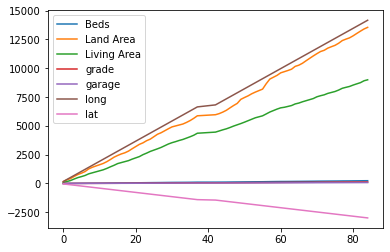

In [26]:
train = df 

# split data from market valuation
X = train.drop('Market Value $', axis = 1)
y = train['Market Value $']

X.plot()

# print(X)
# print(y)

X, y = shuffle(X, y)
tf.keras.backend.set_floatx('float64')

# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# set test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [27]:
model = keras.Sequential([
        Dense(20, activation=tf.nn.relu),
        Dense(5)
])

# Optimisation

model.add(Dense(126, input_dim=15)) #Dense(output_dim(also hidden wight), input_dim = input_dim)
model.add(LeakyReLU(alpha = 0.1)) #Activation

# model.add(Dense(252))
model.add(Dropout(0.5))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(1))
model.add(Activation('linear'))

adam = tf.keras.optimizers.Adam(0.0001)
# Compile Model with the adam optimizer
model.compile(loss='mean_squared_error', metrics=['mse'], optimizer = 'rmsprop')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'loss', patience = 5)

# fit the model and start epochs
model.fit(x = X_train, y = y_train.values,  epochs = 400, callbacks = [early_stop], validation_split = 0.1, batch_size = 32) #, validation_data = (X_test, y_test.values), batch_size = 128, epochs = 400, verbose=1, validation_split = 0.3, callbacks = [early_stop]

import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'model__')

# save model
model.save('hpp.h5') 

0000 - val_mse: 928186083616476.0000
Epoch 154/400
2/2 [==============================] - 0s 9ms/step - loss: 1141742935875102.0000 - mse: 1141742965347128.2500 - val_loss: 925143538860032.0000 - val_mse: 925143463468192.1250
Epoch 155/400
2/2 [==============================] - 0s 10ms/step - loss: 1137953341748404.7500 - mse: 1137953326571927.0000 - val_loss: 922353487839232.0000 - val_mse: 922353472744229.1250
Epoch 156/400
2/2 [==============================] - 0s 10ms/step - loss: 1144967319411290.2500 - mse: 1144967351684663.2500 - val_loss: 919461498454016.0000 - val_mse: 919461513234466.7500
Epoch 157/400
2/2 [==============================] - 0s 9ms/step - loss: 1132942084702850.5000 - mse: 1132942075614190.2500 - val_loss: 916531391234048.0000 - val_mse: 916531379590004.1250
Epoch 158/400
2/2 [==============================] - 0s 10ms/step - loss: 1132783352501589.2500 - mse: 1132783353414835.7500 - val_loss: 913409688207360.0000 - val_mse: 913409675660203.2500
Epoch 159/400
2